# **🌱 EPOCH 비기너 세션 4주차 복습문제**



---



## **1️⃣ 'market_2017.csv' 파일과 'market_2022.csv' 파일을 불러와 상가 데이터를 분석하세요.**

### (0) 데이터를 불러오세요.

In [ ]:
import pandas as pd

# CSV 파일 불러오기
market_2017 = pd.read_csv('market_2017.csv')
market_2022 = pd.read_csv('market_2022.csv')

# 데이터 확인
market_2017.head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,경도,위도
0,20741628,행운노래연습장,N,관광/여가/오락,N02,무도/유흥/가무,N02A01,노래방,R91223,노래연습장 운영업,11,서울특별시,11230,동대문구,1123065000,장안1동,1123010600,장안동,1.120000e+18,127.064796,37.562441
1,20594635,유림식당,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11380,은평구,1138057000,대조동,1138010600,대조동,1.140000e+18,126.924365,37.609397
2,15551341,대동석유압구정주유소,F,생활서비스,F16,주유소/충전소,F16A01,주유소,G47711,차량용 주유소 운영업,11,서울특별시,11680,강남구,1168054500,압구정동,1168010700,신사동,1.170000e+18,127.033876,37.525321
3,20536992,이삭토스트,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,"피자, 햄버거, 샌드위치 및 유사 음식점업",11,서울특별시,11470,양천구,1147055000,목5동,1147010200,목동,1.150000e+18,126.878696,37.535600
4,20537010,씨유수유빨래골,D,소매,D03,종합소매점,D03A01,편의점,G47122,체인화 편의점,11,서울특별시,11305,강북구,1130561000,수유1동,1130510300,수유동,1.130000e+18,127.017944,37.630684


In [ ]:
market_2022.head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,...,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,경도,위도
0,23324279,제중건강원,D,소매,D10,건강/미용식품,D10A07,건강원,G47216,건강보조식품 소매업,...,서울특별시,11560,영등포구,1156053500,영등포동,1156010600,영등포동5가,1.156010e+18,126.907168,37.520613
1,24525909,민속악기사,D,소매,D04,취미/오락관련소매,D04A09,악기판매,G47593,악기 소매업,...,서울특별시,11200,성동구,1120079000,용답동,1120012200,용답동,1.120010e+18,127.049018,37.566857
2,24715368,태평양진주,D,소매,D26,시계/귀금속소매,D26A01,시계/귀금속,G47830,시계 및 귀금속 소매업,...,서울특별시,11110,종로구,1111061500,종로1.2.3.4가동,1111015200,봉익동,1.111020e+18,126.993530,37.571848
3,15554136,김선희꼼꼼국어교습소,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,P85501,일반 교과 학원,...,서울특별시,11710,송파구,1171056100,방이1동,1171011100,방이동,1.171010e+18,127.121520,37.510967
4,17174175,비지트,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,...,서울특별시,11650,서초구,1165062100,방배4동,1165010100,방배동,1.165010e+18,126.991394,37.488375


### (1) 2017년도에는 존재했는데 2022년도에 사라진 편의점의 개수를 출력하세요.
* Hint: count()

In [ ]:
# ~연산자 이용하여 'store_name' 열에 있는 편의점 이름을 기준으로 2017년에 있지만 2022년에 없는 편의점 찾기
unique_stores_2017 = market_2017[~(market_2017['상호명'].isin(market_2022['상호명']))]

# 개수 세기
unique_store_count = unique_stores_2017['상호명'].count()
unique_store_count

45550

### (2) 2017년과 2022년 데이터를 비교하여, 서울특별시(시도명: "서울특별시") 내에서 위치 변경이 있었던 업소들을 찾으세요. 위치 변경 여부는 경도와 위도의 변화로 판단하고, 상호명과 변화된 위치(경도, 위도) 차이를 '경도차이', '위도차이' 열을 새로 생성하여 출력하세요. (경도차이, 위도차이는 절댓값으로 출력되지 않아도 됩니다.)
* Hint: 비교 연산자 사용 (|, =! 등)

In [ ]:
from pandas import DataFrame

# '시도명'이 '서울특별시'인 데이터 필터링
market_seoul_2017 = market_2017[market_2017['시도명'] == '서울특별시']
market_seoul_2022 = market_2022[market_2022['시도명'] == '서울특별시']

# 상호명 기준으로 두 데이터프레임 병합 (inner join으로 상호명이 같은 데이터만 남김)
merged_data = pd.merge(market_seoul_2017, market_seoul_2022, on='상호명', suffixes=('_2017', '_2022')) #suffixes 를 통해 컬럼명 구분

# 위도와 경도가 다른 데이터들 필터링
location_changed = merged_data[(merged_data['위도_2017'] != merged_data['위도_2022']) |
                               (merged_data['경도_2017'] != merged_data['경도_2022'])]

# 경도차이와 위도차이 계산
location_changed['경도차이'] = location_changed['경도_2022'] - location_changed['경도_2017']
location_changed['위도차이'] = location_changed['위도_2022'] - location_changed['위도_2017']

# 결과 출력
location_changed[['상호명', '경도차이', '위도차이']]


<ipython-input-7-968ff3b33637>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_changed['경도차이'] = location_changed['경도_2022'] - location_changed['경도_2017']
<ipython-input-7-968ff3b33637>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_changed['위도차이'] = location_changed['위도_2022'] - location_changed['위도_2017']


,상호명,경도차이,위도차이
0,행운노래연습장,0.080584,-0.067698
1,행운노래연습장,-0.164687,-0.089659
2,행운노래연습장,-0.152940,0.051950
3,행운노래연습장,0.034069,-0.061052
5,행운노래연습장,-0.245271,-0.021960
...,...,...,...
9113996,톡,-0.162530,-0.017730
9114000,상부상조,-0.145220,0.001814
9114011,부동산컨설팅,-0.017840,-0.034271
9114012,부동산컨설팅,0.161158,0.146163


## **2️⃣‘movie_data.csv’ 파일을 불러와 영화 데이터를 시각화하세요.**

### (0) 데이터를 불러오세요.

In [ ]:
import pandas as pd

movie_data = pd.read_csv('movies.csv')

In [ ]:
# 데이터 확인
movie_data

,name,rating,genre,year,score,votes,country,budget,gross,runtime
0,The Shining,R,Drama,1980,8.4,927000.0,United Kingdom,19000000.0,46998772.0,146.0
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,United States,4500000.0,58853106.0,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,United States,18000000.0,538375067.0,124.0
3,Airplane!,PG,Comedy,1980,7.7,221000.0,United States,3500000.0,83453539.0,88.0
4,Caddyshack,R,Comedy,1980,7.3,108000.0,United States,6000000.0,39846344.0,98.0
...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,3.1,18.0,United States,7000.0,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,4.7,36.0,United States,NaN,NaN,90.0
7665,Saving Mbango,NaN,Drama,2020,5.7,29.0,United States,58750.0,NaN,NaN
7666,It's Just Us,NaN,Drama,2020,NaN,NaN,United States,15000.0,NaN,120.0


### (1) 아래와 같은 평점('score') 상위 10개 영화의 관객 수에 대한 수평 막대 그래프를 그리세요.
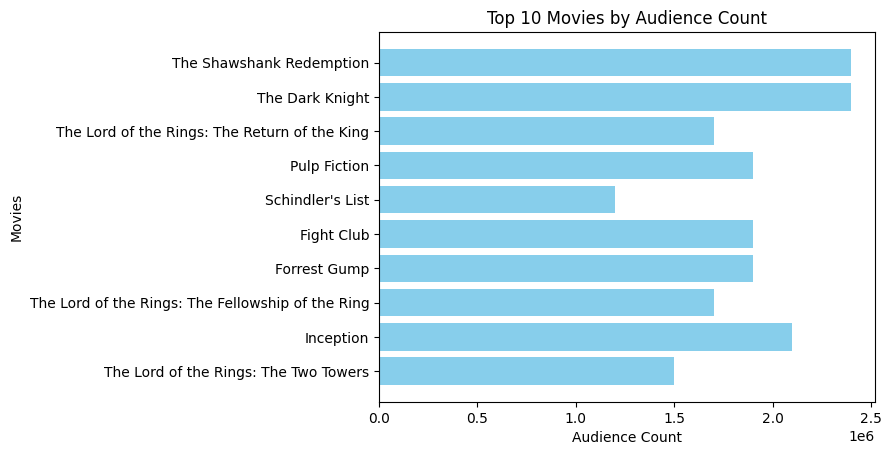

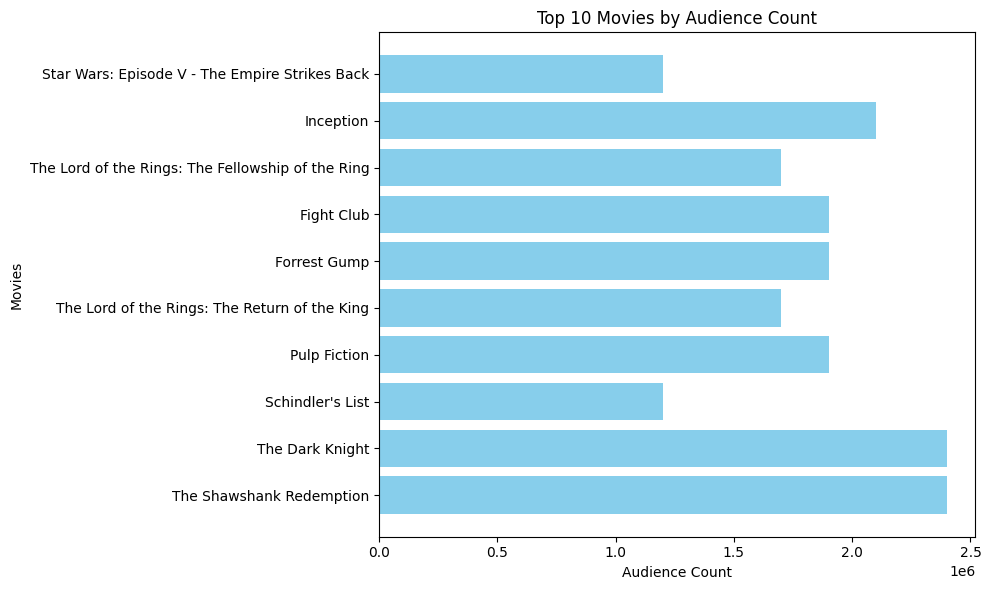

In [ ]:
import matplotlib.pyplot as plt


# 상위 10개의 ['score'] 값을 기준으로 ['name']과 ['votes'] 추출 #nlargest 함수를 통해 상위 10개만 추출
top_10_movies = movie_data.nlargest(10, 'score')[['name', 'votes']]

# 영화 제목과 관객 수 리스트 변환
movies = top_10_movies['name'].tolist()
audience_count = top_10_movies['votes'].tolist()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.barh(movies, audience_count, color='skyblue')
plt.xlabel('Audience Count')
plt.ylabel('Movies')
plt.title('Top 10 Movies by Audience Count')
plt.tight_layout()

plt.show()


### (2) 아래와 같이 연도('year')별 평균 예산('budget')과 수익('gross')을 선 그래프로 나타내세요.
(사용한 색상은 b, forestgreen, orange, skyblue 입니다.)

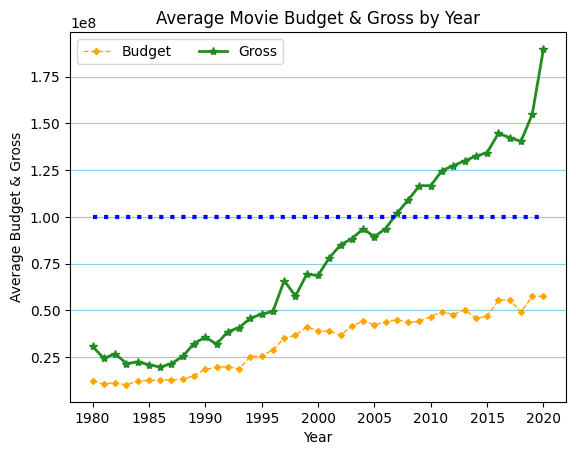

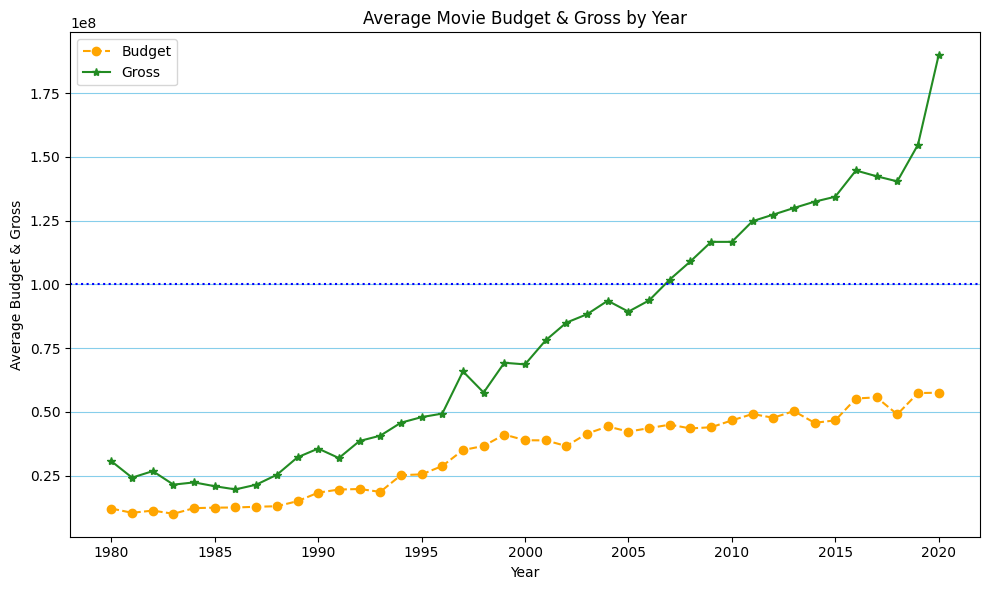

In [ ]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt


# 연도별 평균 예산과 수익 계산 (NaN 값은 무시하고 계산됨)
yearly_data = movie_data.groupby('year')[['budget', 'gross']].mean()
# yearly_data = movie_data.groupby('year').mean()[['budget', 'gross']] # 이거 했다가 계속 에러뜸 ㅠ(문자형까지 같이 평균내버리려 하기 때문에 에러발생)

# 그래프 그리기
plt.figure(figsize=(10, 6))

# budget 그래프
plt.plot(yearly_data.index, yearly_data['budget'], 'o--', color='orange', label='Budget')

# gross 그래프
plt.plot(yearly_data.index, yearly_data['gross'], marker='*', color='forestgreen', label='Gross')

plt.axhline(y=1e8, color='b', linestyle=':')

# 그래프 라벨, 제목, 그리드
plt.xlabel('Year')
plt.ylabel('Average Budget & Gross')
plt.title('Average Movie Budget & Gross by Year')
plt.grid(True, axis='y', color='skyblue')

# 범례 추가
plt.legend()

# 레이아웃 자동 조정
plt.tight_layout()

# 그래프 보여주기
plt.show()
